* [TinyDB Docs](https://tinydb.readthedocs.io/en/latest/usage.html)
* [Pillow docs](https://pillow.readthedocs.io/en/stable/)

In [2]:
from tinydb import TinyDB, Query
import webbrowser
from collections import Counter
from IPython.core.display import display, HTML

In [49]:
import json
from collections import Counter

STOP_WORDS = ['Detroit', 'Cleveland', 'Akron', 'Ohio', 'Allegheny', 'Cuyahoga', 'Summit County', 'Wayne County', 'Michigan' ]
KEEP_WORDS = ['Chicago', 'Cook County', 'Illinois']

def source_filter(doc_json):
    for word in STOP_WORDS:
        if word.lower() in doc_json['source'].lower():
            return False
    return True

def inverse_source_filter(doc_json):
    return not(source_filter(doc_json))
    
docs = json.load(open('../data/DocumentCloud/documents.json'))
# c = Counter(x['source'] for x in filter(source_filter, docs))
# sorted(c)
#chicago_docs = filter(source_filter, docs)
#json.dump(list(chicago_docs),open("../data/DocumentCloud/filtered_documents.json",'w'))

        

In [116]:
docs[0]

{'id': '6572198-Committee-on-License-and-Consumer-Protection',
 'title': 'Committee on License and Consumer Protection 2019-12-12 - Notice',
 'access': 'public',
 'pages': 1,
 'description': None,
 'source': 'Chicago City Council',
 'created_at': 'Tue, 10 Dec 2019 12:34:30 +0000',
 'updated_at': 'Tue, 10 Dec 2019 12:34:35 +0000',
 'canonical_url': 'https://www.documentcloud.org/documents/6572198-Committee-on-License-and-Consumer-Protection.html',
 'language': 'eng',
 'file_hash': '25511fc244dab7114fd8d94721bea4b14b225716',
 'display_language': 'eng',
 'resources': {'pdf': 'https://assets.documentcloud.org/documents/6572198/Committee-on-License-and-Consumer-Protection.pdf',
  'text': 'https://assets.documentcloud.org/documents/6572198/Committee-on-License-and-Consumer-Protection.txt',
  'thumbnail': 'https://assets.documentcloud.org/documents/6572198/pages/Committee-on-License-and-Consumer-Protection-p1-thumbnail.gif',
  'search': 'https://www.documentcloud.org/documents/6572198/search.

In [65]:
game_filter = filter(lambda x: x['source'] == "Illinois Gaming Board", docs)

In [51]:
gaming_docs = [x for x in game_filter]

In [117]:
gaming_doc_titles = [x['title'] for x in gaming_docs]
gaming_doc_titles[0]

'Riverboat/Video Gaming 2019-09-16 - Minutes: Open Meeting Minutes'

In [69]:
agendas = []
minutes = []
other = []

for title in gaming_doc_titles:
    if 'agenda' in title.lower():
        agendas.append(title)
    elif 'minutes' in title.lower():
        minutes.append(title)
    else:
        other.append(title)
    
print(len(agendas))
print(len(minutes))
print(other)

163
517
['Riverboat/Video Gaming 2019-06-13 - Addendum: Video Gaming', 'Riverboat/Video Gaming 2015-04-22 - Addendum: Video Gaming', 'Riverboat/Video Gaming 2013-09-19 - Addendum: Video Gaming']


In [57]:
gaming_docs[0]['resources']['text']

'https://assets.documentcloud.org/documents/6550284/Riverboat-Video-Gaming-2019-09-16-Minutes-Open.txt'

In [76]:
import os
all_text = list(os.listdir("../data/DocumentCloud/text"))
len(all_text)

25124

In [80]:
gaming_text_filter = filter(lambda x: 'video-gaming' in x.lower(), all_text)
gaming_text_files = [x for x in gaming_text_filter]
len(gaming_text_files)

683

In [82]:
gaming_text_files[0]

'6134208-Riverboat-Video-Gaming-Special-Meeting-2005-08.txt'

In [108]:
def search(f, phrase):
    fname = "../data/DocumentCloud/text/" + f
    with open(fname, "r") as f:
        searchlines = f.readlines()
    for i, line in enumerate(searchlines):
        if phrase in line: 
            print("FOUND IN: " + str(fname))
            for l in searchlines[i:i+3]:
                print(l)

In [109]:
for f in gaming_text_files:
    search(f, "misconduct")

FOUND IN: ../data/DocumentCloud/text/6134827-Riverboat-Video-Gaming-2017-09-20-Minutes-Video.txt
Handler license of Jeremy David Munos for misconduct, said action to take effect 21 days from

the date of service of the Complaint, unless Answers is properly filed within that timeframe.

Member Robinson seconded the motion. The motion passed unanimously by roll call vote.

FOUND IN: ../data/DocumentCloud/text/6135373-Riverboat-Video-Gaming-Special-Meeting-1999-11.txt
it ever been alleged that any fraud or misconduct took place in relation to the acquisition

of Players licenses in Louisiana. He stated that no misconduct of SIRCC has ever been

alleged in relation to the activities in Louisiana. Mr. Ficaro stated that PII received a

FOUND IN: ../data/DocumentCloud/text/6135373-Riverboat-Video-Gaming-Special-Meeting-1999-11.txt
of Players licenses in Louisiana. He stated that no misconduct of SIRCC has ever been

alleged in relation to the activities in Louisiana. Mr. Ficaro stated that P

In [110]:
for f in gaming_text_files:
    search(f, "arrest")

FOUND IN: ../data/DocumentCloud/text/6133727-Riverboat-Video-Gaming-2007-11-19-Minutes.txt
licensee, for failing to disclose his September 5, 2007 arrest for theft.

Further, Member Sullivan moved that the Board suspend Jeffrey William Clanin’s,

occupational license for 3 days without pay. Said action to take affect twenty-one (21)

FOUND IN: ../data/DocumentCloud/text/6133819-Riverboat-Video-Gaming-2016-11-02-Minutes-Video.txt
license of Michael McCorkle, for failing to disclose his recent arrests and convictions, and for

failing to maintain minimum qualifications for licensure, said action to take effect 21 days from

the date of service of the Complaint, unless an Answer is properly filed within that timeframe.

FOUND IN: ../data/DocumentCloud/text/6139917-Riverboat-Video-Gaming-Special-Meeting-2007-12.txt
Member Gardner asked if the gentleman at Casino Rock Island was arrested, and Mr. O’Shea

went on to say that he was arrested.

Member Winkler asked if the scanning process is q

FOUND IN: ../data/DocumentCloud/text/6134733-Riverboat-Video-Gaming-2013-09-19-Minutes.txt
was so strong that after being arrested at a casino for trespassing, he still could not resist

the urge to gamble again. At a conference of our national organization, I roomed with

one of the speakers. She had been a young, ambitious lawyer in New York, representing

FOUND IN: ../data/DocumentCloud/text/6136899-Riverboat-Video-Gaming-2007-06-26-Minutes.txt
the boats and that if she tried to board again she would be arrested, but indeed she was able to get

on board because the self-exclusion program isn’t doing enough to keep her off.

Last summer after I spoke, I met Crystal Yednak, reporter for the Chicago Tribune. Her article

FOUND IN: ../data/DocumentCloud/text/6136899-Riverboat-Video-Gaming-2007-06-26-Minutes.txt
Member Gardner went on to state that all casino employees are to report any arrests, the Board

means business, and the requirement must be complied with.



FOUND IN: ../data/Do

FOUND IN: ../data/DocumentCloud/text/6134054-Riverboat-Video-Gaming-2017-08-23-Minutes.txt
2016 arrest, said action to take effect 21 days from the date of service of the Complaint, unless

an Answer to the Complaint is properly filed within that time frame. Member Alejandre

seconded the motion. The motion passed unanimously by roll call vote.

FOUND IN: ../data/DocumentCloud/text/6132260-Riverboat-Video-Gaming-2007-10-16-Minutes.txt
his May 7, 2007 arrest and August 6, 2007 conviction.

Further, Member Sullivan moved that the Board suspend Jose Angel

Acevedo-Lemus’ occupational license for 5 days without pay. Said

FOUND IN: ../data/DocumentCloud/text/6132260-Riverboat-Video-Gaming-2007-10-16-Minutes.txt
August 20, 2007 arrest.

Further, Member Winkler moved that the Board suspend Capri Sade

Shoemaker’s occupational license for 3 days without pay. Said action

FOUND IN: ../data/DocumentCloud/text/6132260-Riverboat-Video-Gaming-2007-10-16-Minutes.txt
2007 arrest.

Further, Member Wi

In [120]:
for f in gaming_text_files:
    search(f, "Obama")

In [115]:
for f in gaming_text_files:
    search(f, "DISCIPLINARY")

FOUND IN: ../data/DocumentCloud/text/6132304-Riverboat-Video-Gaming-2010-02-10-Minutes.txt
PROPOSED COMPLAINT AND DISCIPLINARY ACTION

●



FOUND IN: ../data/DocumentCloud/text/6157090-Riverboat-Video-Gaming-2016-12-13-Minutes.txt
DISCIPLINARY ACTIONS

Member Dolins moved that the Board issue a Disciplinary Complaint against Patriot

Gaming & Electronics, Inc. fining the licensee $5,000.00 for failing to timely file its

FOUND IN: ../data/DocumentCloud/text/6133083-Riverboat-Video-Gaming-2018-01-08-Minutes-Video.txt
 DISCIPLINARY ACTIONS

Active Tax Liability and Failure to Meet the Minimum Qualifications

Member Alejandre moved that the Board issue a Disciplinary Complaint revoking the location

FOUND IN: ../data/DocumentCloud/text/6133713-Riverboat-Video-Gaming-2003-04-15-Minutes.txt
IN RE THE DISCIPLINARY ACTION OF TERRY SHUMAKER - Based on a review of

Staff's investigation and recommendation, Member Clark moved that the Board issue a

disciplinary complaint against Terry Shumaker,

FOUND IN: ../data/DocumentCloud/text/6133989-Riverboat-Video-Gaming-2017-05-24-Minutes.txt
DISCIPLINARY ACTIONS

Member Robinson moved that based on Staff’s investigation and recommendation, I move that

the Board revoke the Level 3 Occupational License of Daniela Degrado due to her recent felony

FOUND IN: ../data/DocumentCloud/text/6135069-Riverboat-Video-Gaming-2018-08-01-Minutes.txt
DISCIPLINARY ACTIONS

Member Alejandre moved to revoke the Occupational License of Jamie Lee Lamb. Member

Robinson seconded the motion.

FOUND IN: ../data/DocumentCloud/text/6136899-Riverboat-Video-Gaming-2007-06-26-Minutes.txt
PROPOSED COMPLAINTS AND DISCIPLINARY ACTIONS –

Member Gardner went on to state that all casino employees are to report any arrests, the Board

means business, and the requirement must be complied with.

FOUND IN: ../data/DocumentCloud/text/6132223-Riverboat-Video-Gaming-2006-06-22-Minutes.txt
PROPOSED COMPLAINTS AND DISCIPLINARY ACTIONS

Chief Legal Counsel Mike Fries stated th

FOUND IN: ../data/DocumentCloud/text/6132260-Riverboat-Video-Gaming-2007-10-16-Minutes.txt
PROPOSED COMPLAINTS AND DISCIPLINARY ACTIONS



•

FOUND IN: ../data/DocumentCloud/text/6419284-Riverboat-Video-Gaming-2019-08-08-Minutes-Open.txt
DISCIPLINARY COMPLAINTS

Member Ramirez moved that the Board issue a Disciplinary Complaint revoking the Level 3

occupational license of Andrea Marie Sadler, revocation taking effect 21 days after the Notice of

FOUND IN: ../data/DocumentCloud/text/6132912-Riverboat-Video-Gaming-2012-07-19-Minutes.txt
PROPOSED COMPLAINTS AND DISCIPLINARY ACTIONS

●



FOUND IN: ../data/DocumentCloud/text/6134316-Riverboat-Video-Gaming-2007-04-17-Minutes.txt
PROPOSED COMPLAINTS AND DISCIPLINARY ACTION

Based on staff’s investigation and recommendation, Member Sullivan moved that the Board

issue a Disciplinary Complaint against John L. Johnson, a Level 3 Occupational Licensee,

FOUND IN: ../data/DocumentCloud/text/6134877-Riverboat-Video-Gaming-2014-09-22-Minutes-Video

In [ ]:
chicago_docs = filter(source_filter,docs)
json.dump(list(chicago_docs),open("../data/DocumentCloud/filtered_documents.json",'w'))

In [13]:
json.dump(list(gaming_filter),open("../data/DocumentCloud/filtered_documents.json",'w'))

In [29]:
c.most_common()

[('Illinois Gaming Board', 683)]

In [55]:
docs[0]['resources']['text']

'https://assets.documentcloud.org/documents/6572198/Committee-on-License-and-Consumer-Protection.txt'

In [30]:
db = TinyDB('../data/DocumentCloud/db.json')
empty_file_ids = !find ../data/DocumentCloud/text -size 0 | awk -F/ '{print $5}' | awk -F. '{print $1}'
recs = db.search(Query().id.one_of(empty_file_ids))

In [53]:
Counter(x['pages'] for x in recs).most_common(10)

[(1, 54),
 (2, 30),
 (3, 18),
 (7, 13),
 (4, 13),
 (11, 9),
 (10, 8),
 (5, 6),
 (14, 5),
 (8, 4)]

In [124]:
class DocDisplayWidget:
    def __init__(self, data):
        self.data = data
    def _repr_html_(self):
        html = f"""
        <div style="display: inline-grid; width: 200px">
        <a href=\"{self.data['canonical_url']}\"><img style="border: 1px solid black" src="{self.data['resources']['thumbnail']}"></a>
        {self.data['title']} <a href=\"{self.data['resources']['text']}\">[ TXT ]</a> 
        </div>
        """
        return html
    def __repr__(self):
        return f"{self.data['title']} ({self.data['id']})"

    
class DocList:
    def __init__(self,docs=None):
        if docs is None:
            docs = []
        self.docs = docs
    def add(self, doc):
        self.docs.append(doc)
    def _repr_html_(self):
        concat = " ".join(x._repr_html_() for x in self.docs)
        return f"<div style='display: grid;'>{concat}</div>"

DocList([DocDisplayWidget(x) for x in recs[:3]])    

In [ ]:
import requests
from PIL import Image
from io import BytesIO


def getimage(doc):
    """Return the colors for the thumbnail in this document record"""
    thumb_url = doc['resources']['thumbnail']
    r = requests.get(thumb_url)
    i = Image.open(BytesIO(r.content))
    return i

for x in recs:
    x['image'] = getimage(x)
    print(x['title'])
    

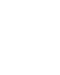

Six Corners Commission 2019-12-02 - Agenda


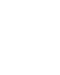

Board of Directors 2019-07-18 - Minutes


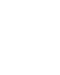

Annual Board of Directors Meeting 2019-01-29 - Minutes


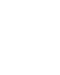

Board of Directors 2019-05-16 - Agenda


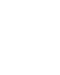

Board of Directors Special Meeting 2019-09-05 - Agenda


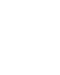

Board of Directors 2019-07-18 - Agenda


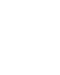

Board of Directors Meeting and Retreat 2019-03-29 - Agenda


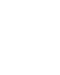

Board of Directors 2019-05-16 - Minutes


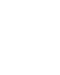

Annual Board of Directors Meeting 2019-01-29 - Agenda


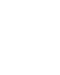

Board of Directors Special Meeting 2019-09-05 - Minutes


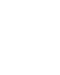

Board of Directors Meeting and Retreat 2019-03-29 - Minutes


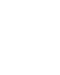

Board of Directors 2019-11-21 - Agenda


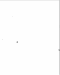

Detroit City Council Formal Session 2019-11-12 - PED FORMAL AGENDA REFERRAL 11-12-2019.Pdf


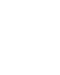

Six Corners Commission 2019-10-17 - Agenda


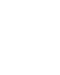

Six Corners Commission 2019-07-11 - Agenda


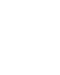

Six Corners Commission 2019-07-11 - Minutes


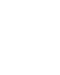

Six Corners Commission 2019-04-18 - Minutes


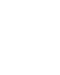

Six Corners Commission 2019-04-18 - Agenda


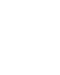

Six Corners Commission 2019-01-17 - Minutes


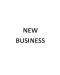

New Business Council Session 2019-01-15 - NEW BUSINESS VOTING 1-15-19.Pdf


20

In [174]:
# '6544125-Detroit-City-Council-Formal-Session-2019-11-12' has 11 colors, but one of them is 96% of pixels in the thumbnail and clearly doesn't have naything interesting
# find more like that.
chk = []
for i,x in enumerate(recs):
    for count, color in x['image'].getcolors():
        if count / 4500 > .96:
            chk.append(x)
            display(x['image'])
            print(x['title'])
len(chk)

In [162]:
len(recs[14]['image'].getcolors())

11

In [115]:
# TODO: maybe something more than colors, because there are a couple that are nearly blank but have 
# just a little schmutz in them, like...
DocDisplayWidget(chk[2])

Detroit City Council Formal Session 2019-11-12 - PED FORMAL AGENDA REFERRAL 11-12-2019.Pdf (6544125-Detroit-City-Council-Formal-Session-2019-11-12)

In [111]:
DocList([DocDisplayWidget(x) for x in chk[10:20]])